<a 
 href="https://colab.research.google.com/github/LearnPythonWithRune/MachineLearningWithPython/blob/main/colab/final/06 - Project - Neural Network.ipynb"
 target="_parent">
<img 
 src="https://colab.research.google.com/assets/colab-badge.svg"
alt="Open In Colab"/>
</a>

# Project: Neural Network
- Diabetes Classification
- Given a dataset of various metrics can we predict if a patient has diabetes

### Step 1: Import libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
#from tf.keras.layers import Input, Dense
#from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Read the data
- Use Pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method to read **files/diabetes.csv**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/LearnPythonWithRune/MachineLearningWithPython/main/jupyter/final/files/diabetes.csv')
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


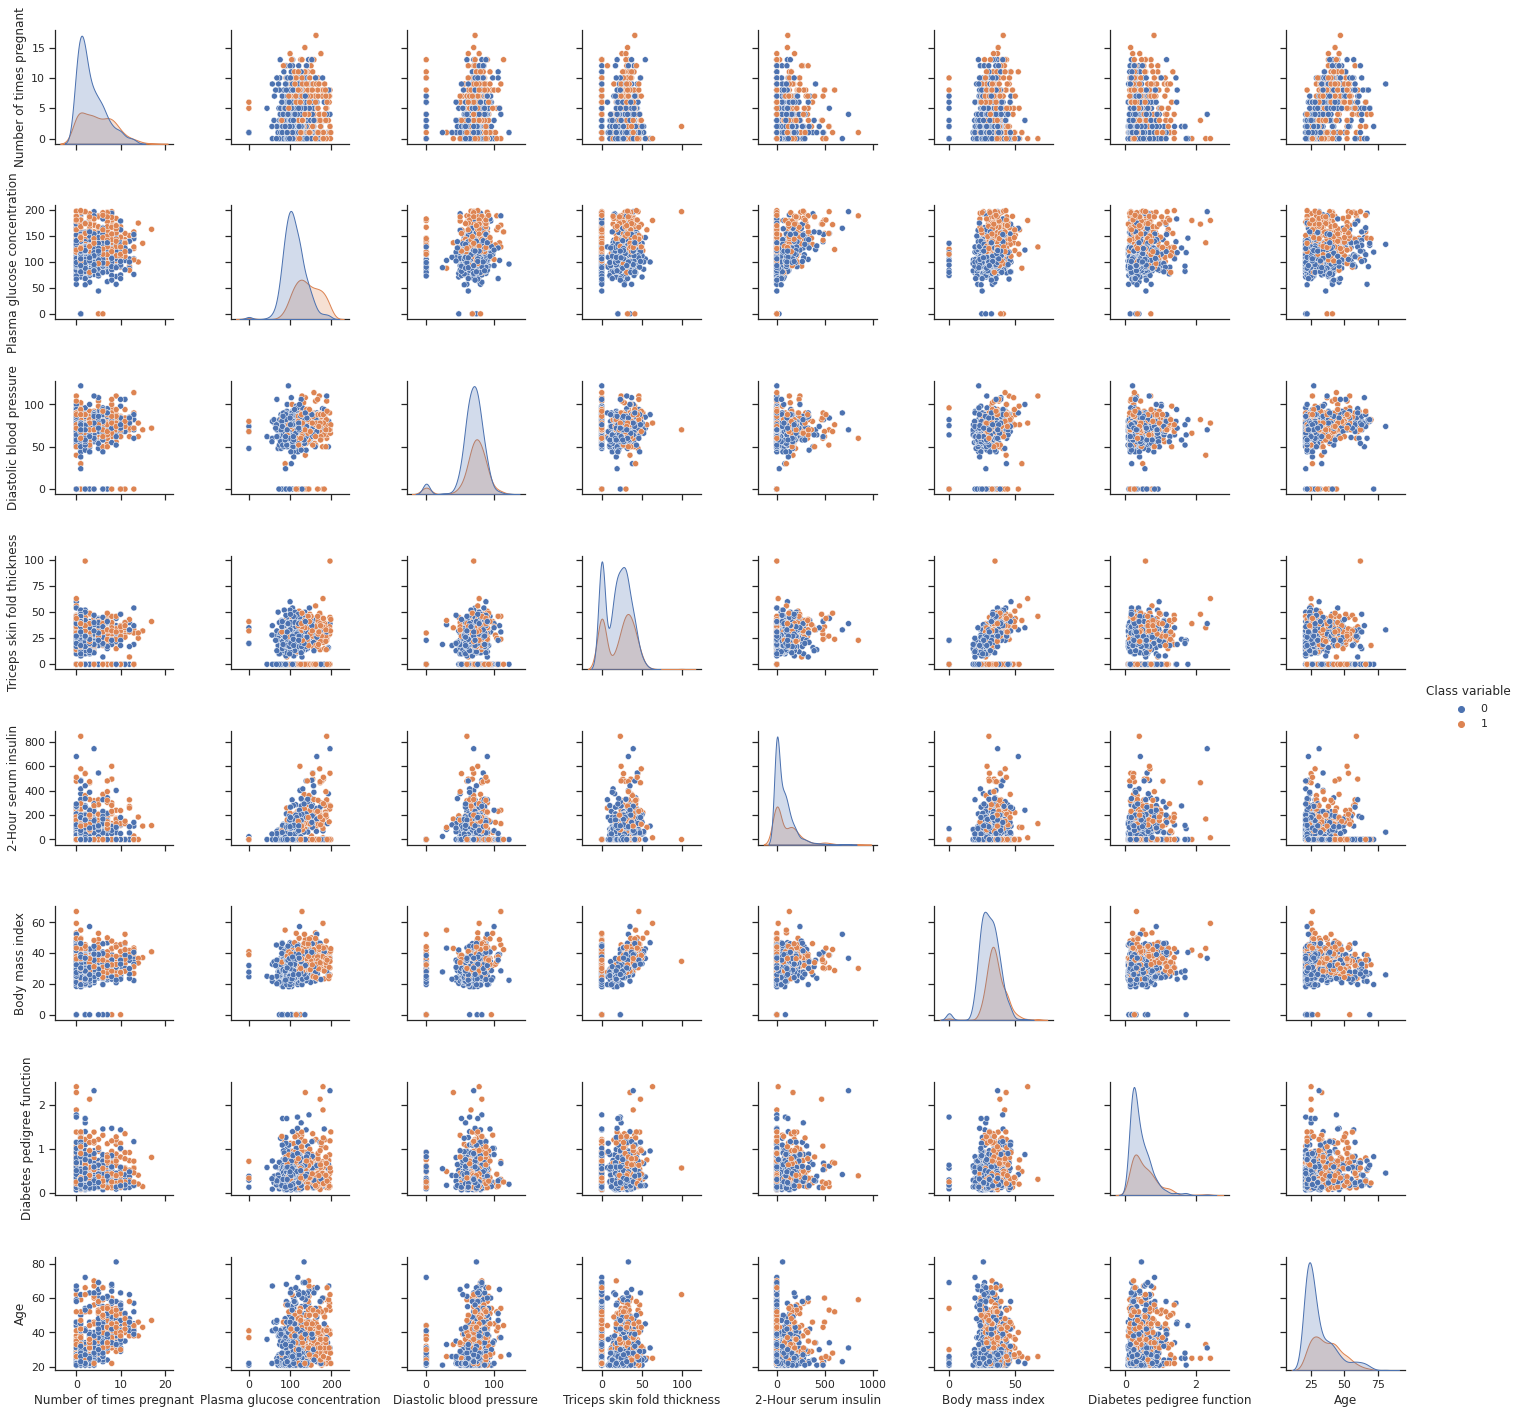

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(data, hue="Class variable")

### Step 3: Check for data quality
- Check **.isna().sum()**
- Check **.dtypes**

In [ ]:
data.isna().sum()

Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skin fold thickness     0
2-Hour serum insulin            0
Body mass index                 0
Diabetes pedigree function      0
Age                             0
Class variable                  0
dtype: int64

In [ ]:
data.dtypes

Number of times pregnant          int64
Plasma glucose concentration      int64
Diastolic blood pressure          int64
Triceps skin fold thickness       int64
2-Hour serum insulin              int64
Body mass index                 float64
Diabetes pedigree function      float64
Age                               int64
Class variable                    int64
dtype: object

### Step 4: Create dataset
- Assign **X** to all but the last column
- Assign **y** to the last column

In [ ]:
X = data[data.columns[:-1]].values
y = data[data.columns[-1]].values

### Step 5: Create training and test set
- Use **train_test_split** to create **X_train, X_test, y_train, y_test**.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Step 6: Calculate average accuracy for 10 runs
- Create an empty list and assign it to **accuracies**
- Loop over **i** over 10 integers.
    - Set the random seed: **tf.random.set_seed(i)**
    - Create a **Sequential** model
    - Add a **Dense** layer with one exit node and **input_dim=8**, and **activation='sigmoid'**
    - Compile the model with **loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']**
    - Fit the model with **epochs=1500, batch_size=100, verbose=0**
    - Calculate the accuracy with **evaluate** on **X_test** and **y_test**
        - The second return variable is the accuracy
    - Append the accuracy (possibly multiplied by 100) to **accuraries**
- Calculate the average value

In [ ]:
accuracies = []

for i in range(10):
  tf.random.set_seed(i)
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(1, input_dim=8, activation='sigmoid')
  ])
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
  model.fit(X_train, y_train, epochs=1500, batch_size=100, verbose=0)
  _, accuracy = model.evaluate(X_test, y_test)
  accuracies.append(accuracy*100)


6/6 [==============================] - 0s 3ms/step - loss: 0.5238 - accuracy: 0.7760


In [ ]:
sum(accuracies)/len(accuracies)

75.15625

### Step 7: Predict values
- Predict all values with model on **X**
- Make it into class ids with **np.where(y_pred < 0.5, 0, 1)** *(assuming **y_pred** is the predictions)*

In [ ]:
y_pred = model.predict(X)
y_pred = np.where(y_pred<.5,0,1)

24/24 [==============================] - 0s 1ms/step


In [ ]:
train, valid, test = np.split(data.sample(frac=1), [int(0.6*len(data)), int(0.8*len(data))])

In [ ]:
def dataset(dataframe):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  data = np.hstack((x,np.reshape(y,(len(y),1))))
  return data,x,y

In [ ]:
train, x_train, y_train = dataset(train)
valid, x_valid, y_valid = dataset(valid)
test, x_test, y_test = dataset(test)

In [ ]:
x_train

array([[  3.   , 130.   ,  64.   , ...,  23.1  ,   0.314,  22.   ],
       [  1.   ,  89.   ,  66.   , ...,  28.1  ,   0.167,  21.   ],
       [  1.   , 100.   ,  66.   , ...,  32.   ,   0.444,  42.   ],
       ...,
       [ 13.   ,  76.   ,  60.   , ...,  32.8  ,   0.18 ,  41.   ],
       [  2.   , 107.   ,  74.   , ...,  33.6  ,   0.404,  23.   ],
       [ 12.   , 140.   ,  85.   , ...,  37.4  ,   0.244,  41.   ]])

### Step 8 (Optional): Visualize correct vs incorrect predictions
- Calculate the ones that differ
    - **np.abs(y.to_numpy() - y_pred.T)** *(assuming the variables names are correct)*
    - Incorrect predictions will be 1, correct will be 0
- Make a scatter plot with the two variables and the correctness calculations as colors

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(8,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


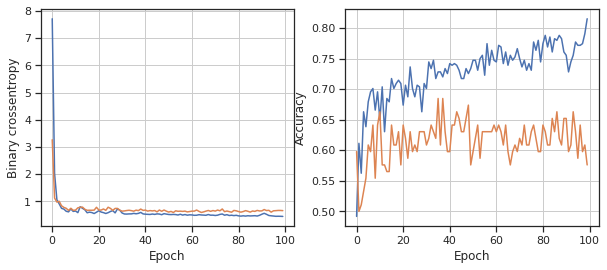

5/5 [==============================] - 0s 4ms/step - loss: 0.5780 - accuracy: 0.7273
16 nodes, dropout 0, lr 0.01, batch size 64


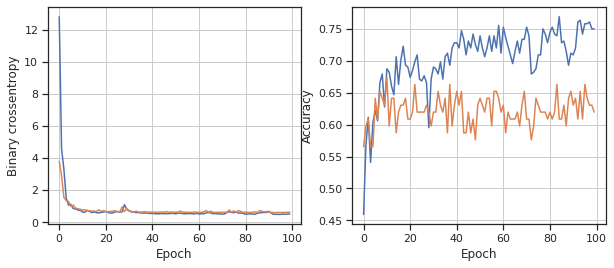

5/5 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.7013
16 nodes, dropout 0, lr 0.01, batch size 128


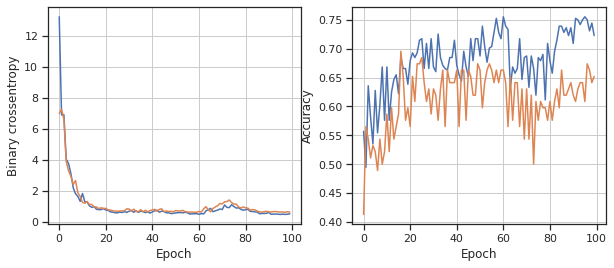

5/5 [==============================] - 0s 3ms/step - loss: 0.5376 - accuracy: 0.7532
16 nodes, dropout 0, lr 0.005, batch size 32


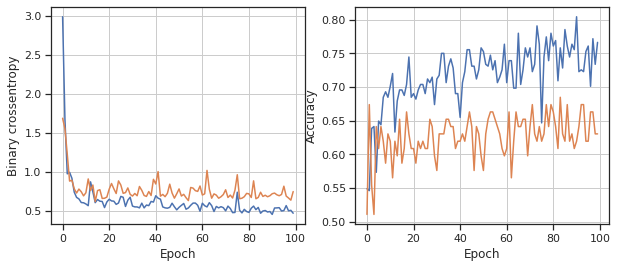

5/5 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.7403
16 nodes, dropout 0, lr 0.005, batch size 64


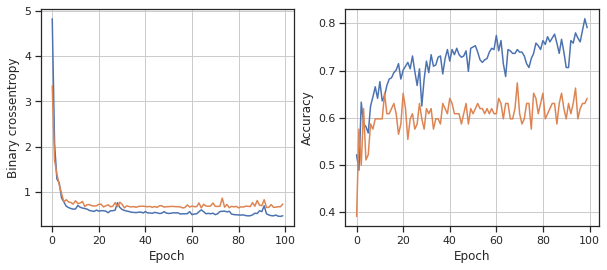

5/5 [==============================] - 0s 4ms/step - loss: 0.5760 - accuracy: 0.7143
16 nodes, dropout 0, lr 0.005, batch size 128


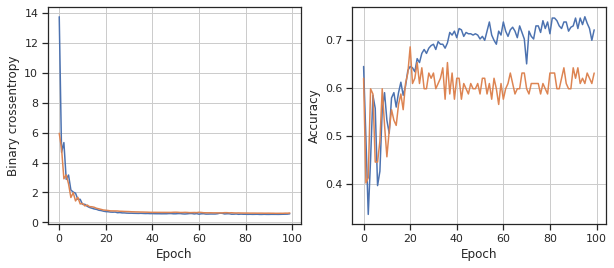

5/5 [==============================] - 0s 3ms/step - loss: 0.6367 - accuracy: 0.7273
16 nodes, dropout 0, lr 0.001, batch size 32


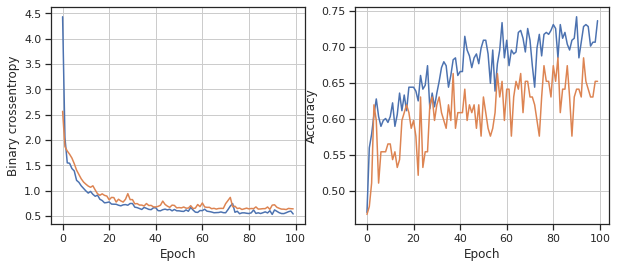

5/5 [==============================] - 0s 3ms/step - loss: 0.5359 - accuracy: 0.7468
16 nodes, dropout 0, lr 0.001, batch size 64


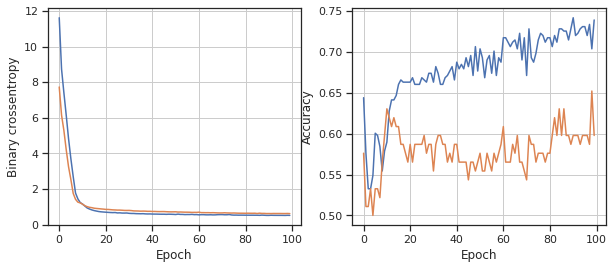

5/5 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.7143
16 nodes, dropout 0, lr 0.001, batch size 128


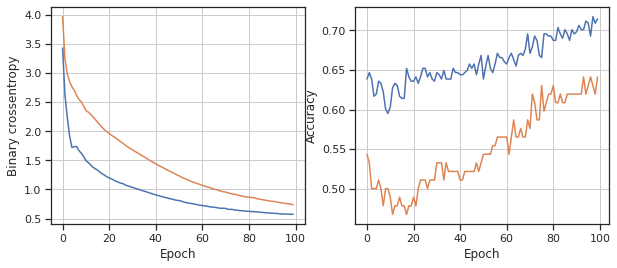

5/5 [==============================] - 0s 4ms/step - loss: 0.7022 - accuracy: 0.6753
16 nodes, dropout 0.2, lr 0.01, batch size 32


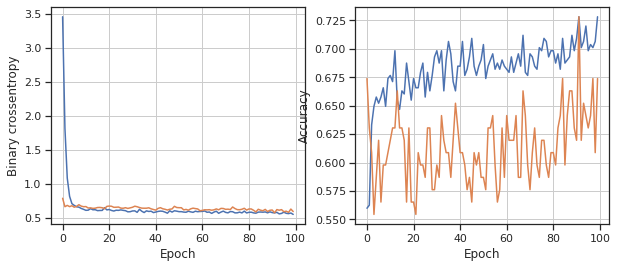

5/5 [==============================] - 0s 3ms/step - loss: 0.5318 - accuracy: 0.6948
16 nodes, dropout 0.2, lr 0.01, batch size 64


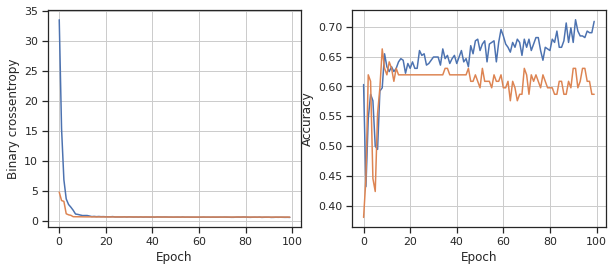

5/5 [==============================] - 0s 3ms/step - loss: 0.6014 - accuracy: 0.6623
16 nodes, dropout 0.2, lr 0.01, batch size 128


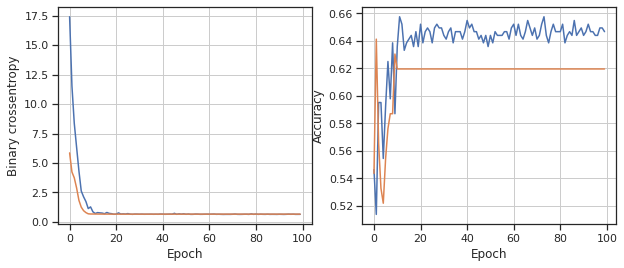

5/5 [==============================] - 0s 3ms/step - loss: 0.6638 - accuracy: 0.6234
16 nodes, dropout 0.2, lr 0.005, batch size 32


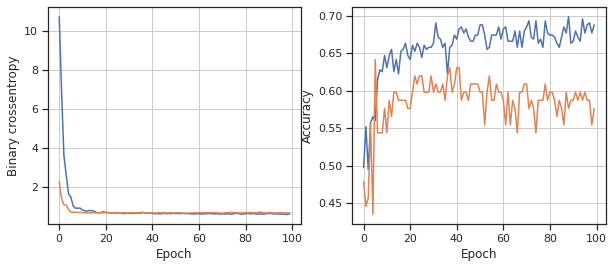

5/5 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.6623
16 nodes, dropout 0.2, lr 0.005, batch size 64


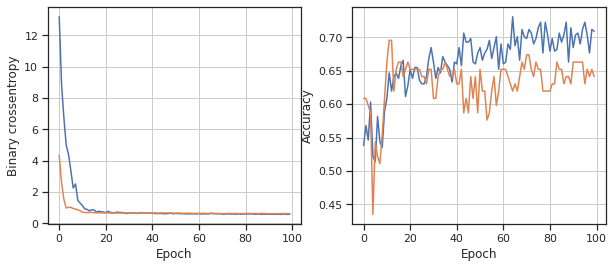

5/5 [==============================] - 0s 4ms/step - loss: 0.5690 - accuracy: 0.6883
16 nodes, dropout 0.2, lr 0.005, batch size 128


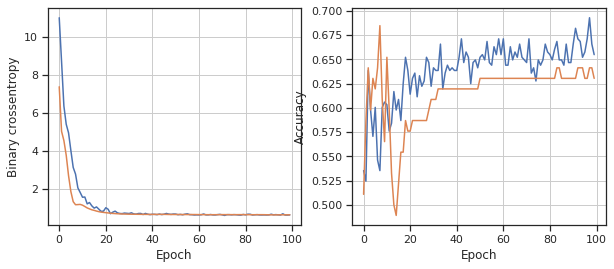

5/5 [==============================] - 0s 3ms/step - loss: 0.6243 - accuracy: 0.6364
16 nodes, dropout 0.2, lr 0.001, batch size 32


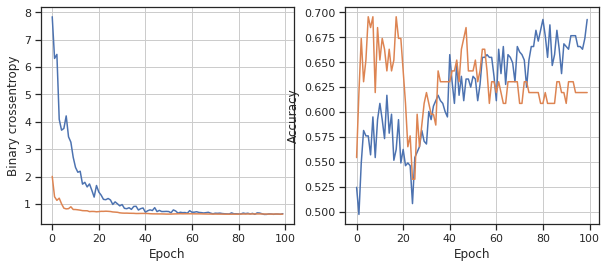

5/5 [==============================] - 0s 2ms/step - loss: 0.5846 - accuracy: 0.7013
16 nodes, dropout 0.2, lr 0.001, batch size 64


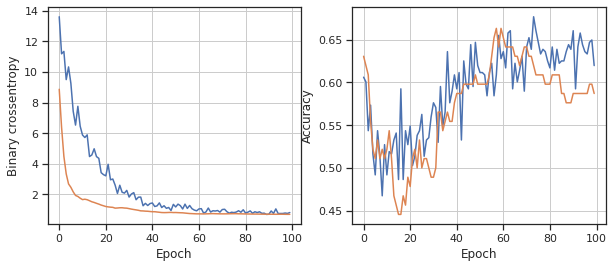

5/5 [==============================] - 0s 3ms/step - loss: 0.6593 - accuracy: 0.6104
16 nodes, dropout 0.2, lr 0.001, batch size 128


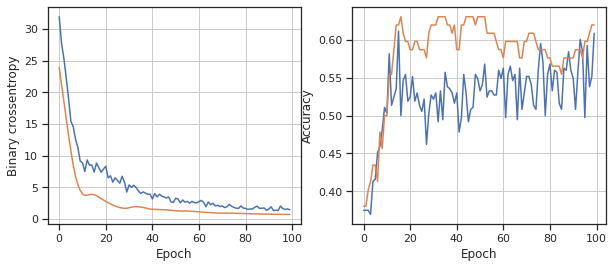

5/5 [==============================] - 0s 5ms/step - loss: 0.7640 - accuracy: 0.6234
32 nodes, dropout 0, lr 0.01, batch size 32


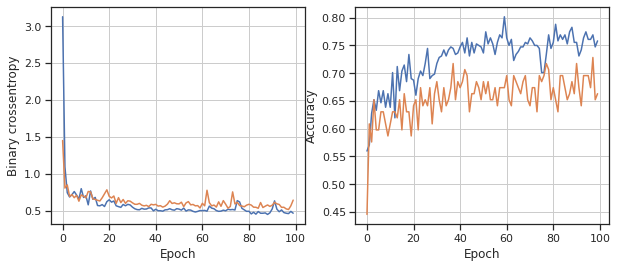

5/5 [==============================] - 0s 3ms/step - loss: 0.5950 - accuracy: 0.7208
32 nodes, dropout 0, lr 0.01, batch size 64


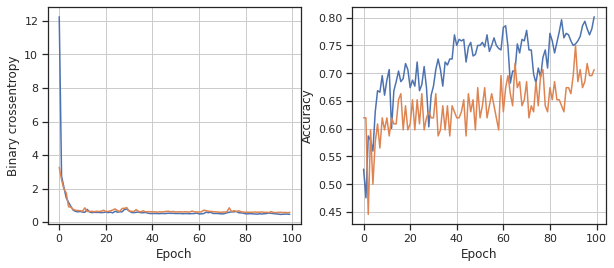

5/5 [==============================] - 0s 3ms/step - loss: 0.6506 - accuracy: 0.7597
32 nodes, dropout 0, lr 0.01, batch size 128


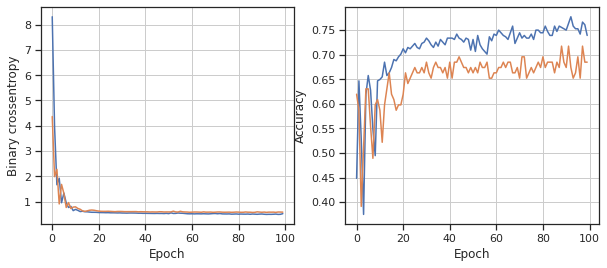

5/5 [==============================] - 0s 3ms/step - loss: 0.5393 - accuracy: 0.7468
32 nodes, dropout 0, lr 0.005, batch size 32


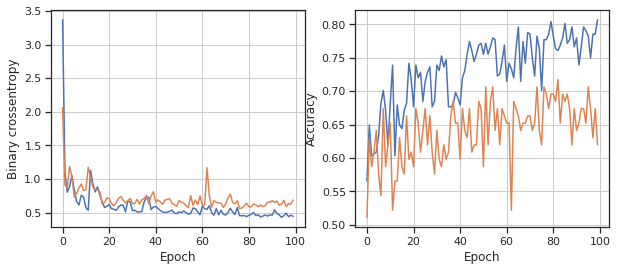

5/5 [==============================] - 0s 3ms/step - loss: 0.5573 - accuracy: 0.7273
32 nodes, dropout 0, lr 0.005, batch size 64


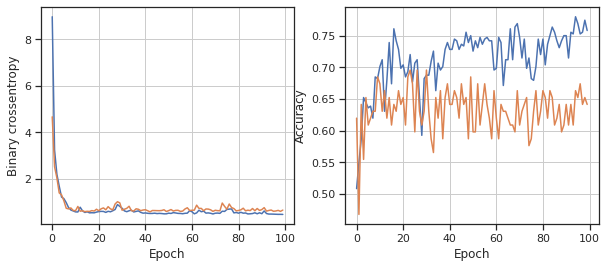

5/5 [==============================] - 0s 3ms/step - loss: 0.6182 - accuracy: 0.7208
32 nodes, dropout 0, lr 0.005, batch size 128


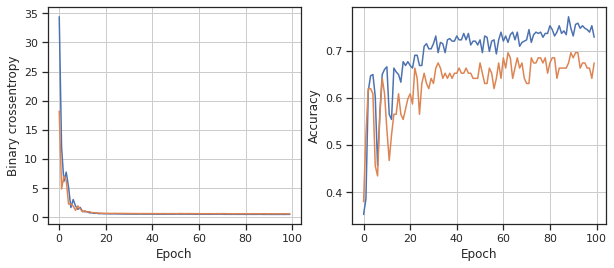

5/5 [==============================] - 0s 3ms/step - loss: 0.5983 - accuracy: 0.6948
32 nodes, dropout 0, lr 0.001, batch size 32


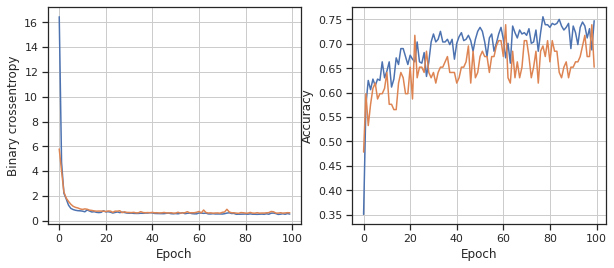

5/5 [==============================] - 0s 3ms/step - loss: 0.5634 - accuracy: 0.7403
32 nodes, dropout 0, lr 0.001, batch size 64


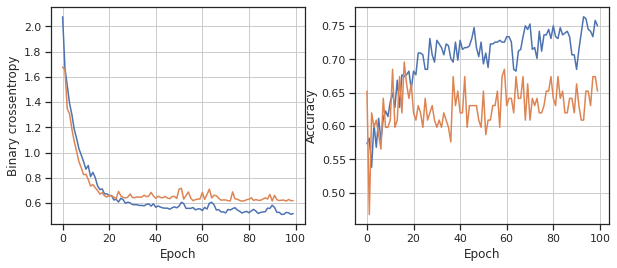

5/5 [==============================] - 0s 3ms/step - loss: 0.6194 - accuracy: 0.7338
32 nodes, dropout 0, lr 0.001, batch size 128


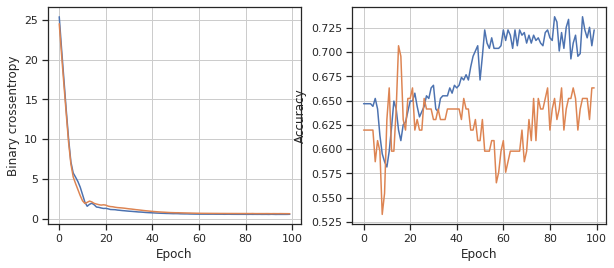

5/5 [==============================] - 0s 6ms/step - loss: 0.6730 - accuracy: 0.6883
32 nodes, dropout 0.2, lr 0.01, batch size 32


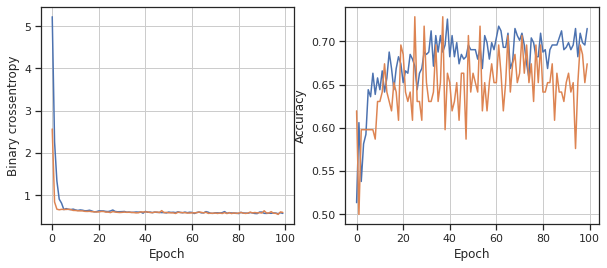

5/5 [==============================] - 0s 3ms/step - loss: 0.5560 - accuracy: 0.7468
32 nodes, dropout 0.2, lr 0.01, batch size 64


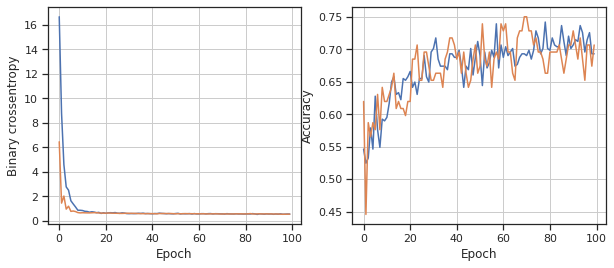

5/5 [==============================] - 0s 3ms/step - loss: 0.5638 - accuracy: 0.7078
32 nodes, dropout 0.2, lr 0.01, batch size 128


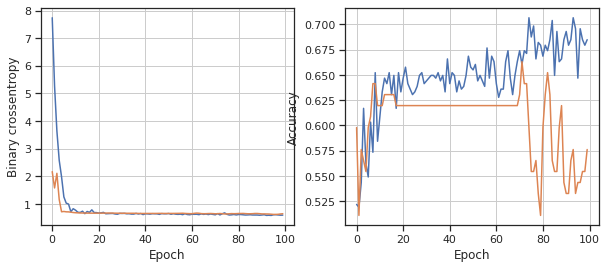

5/5 [==============================] - 0s 4ms/step - loss: 0.6039 - accuracy: 0.6623
32 nodes, dropout 0.2, lr 0.005, batch size 32


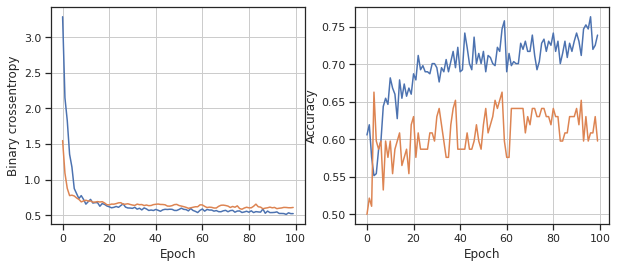

5/5 [==============================] - 0s 3ms/step - loss: 0.5593 - accuracy: 0.7208
32 nodes, dropout 0.2, lr 0.005, batch size 64


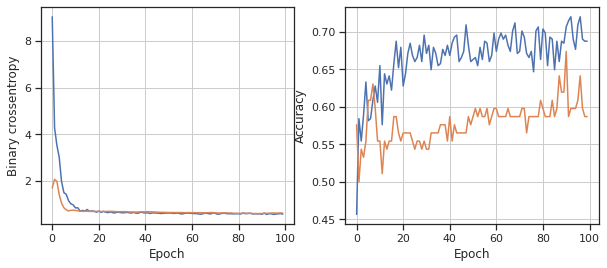

5/5 [==============================] - 0s 3ms/step - loss: 0.6020 - accuracy: 0.6753
32 nodes, dropout 0.2, lr 0.005, batch size 128


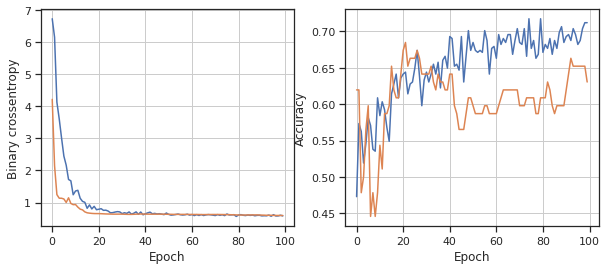

5/5 [==============================] - 0s 3ms/step - loss: 0.6007 - accuracy: 0.6948
32 nodes, dropout 0.2, lr 0.001, batch size 32


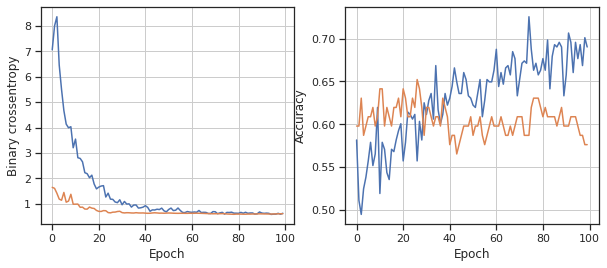

5/5 [==============================] - 0s 3ms/step - loss: 0.6045 - accuracy: 0.6494
32 nodes, dropout 0.2, lr 0.001, batch size 64


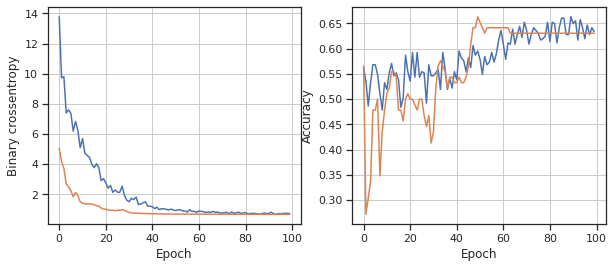

5/5 [==============================] - 0s 4ms/step - loss: 0.6575 - accuracy: 0.6299
32 nodes, dropout 0.2, lr 0.001, batch size 128


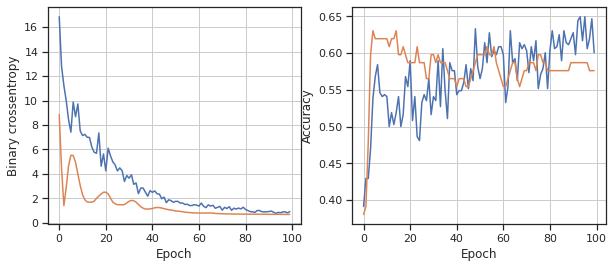

5/5 [==============================] - 0s 3ms/step - loss: 0.6759 - accuracy: 0.6169
64 nodes, dropout 0, lr 0.01, batch size 32


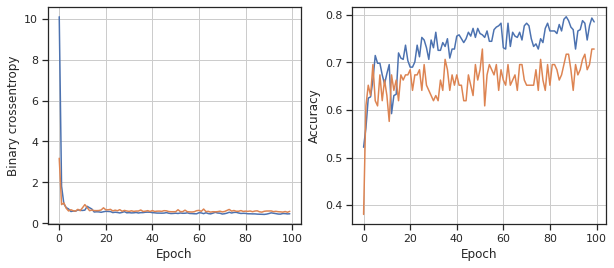

5/5 [==============================] - 0s 3ms/step - loss: 0.5354 - accuracy: 0.7468
64 nodes, dropout 0, lr 0.01, batch size 64


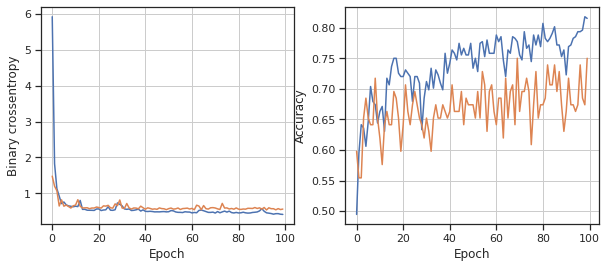

5/5 [==============================] - 0s 3ms/step - loss: 0.5429 - accuracy: 0.7532
64 nodes, dropout 0, lr 0.01, batch size 128


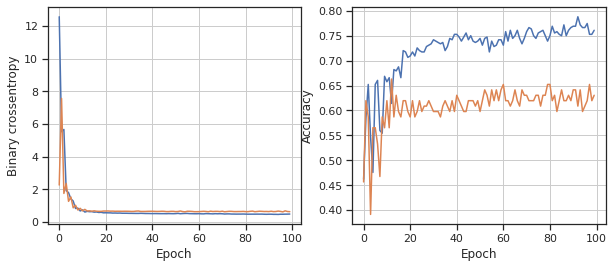

5/5 [==============================] - 0s 3ms/step - loss: 0.5518 - accuracy: 0.7273
64 nodes, dropout 0, lr 0.005, batch size 32


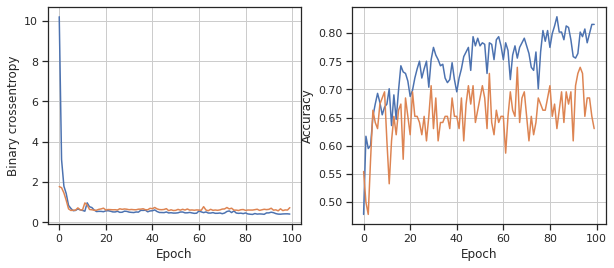

5/5 [==============================] - 0s 4ms/step - loss: 0.6835 - accuracy: 0.6818
64 nodes, dropout 0, lr 0.005, batch size 64


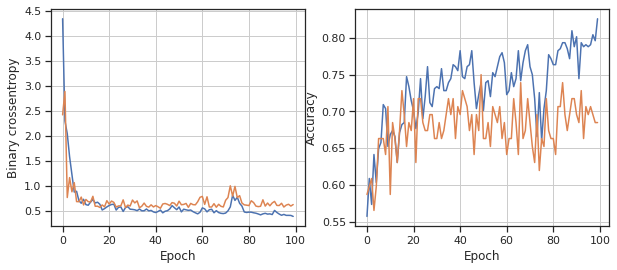

5/5 [==============================] - 0s 4ms/step - loss: 0.6789 - accuracy: 0.7273
64 nodes, dropout 0, lr 0.005, batch size 128


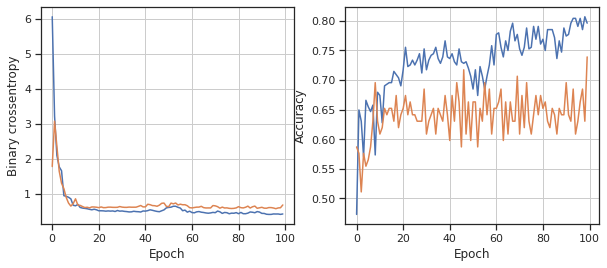

5/5 [==============================] - 0s 3ms/step - loss: 0.6316 - accuracy: 0.7013
64 nodes, dropout 0, lr 0.001, batch size 32


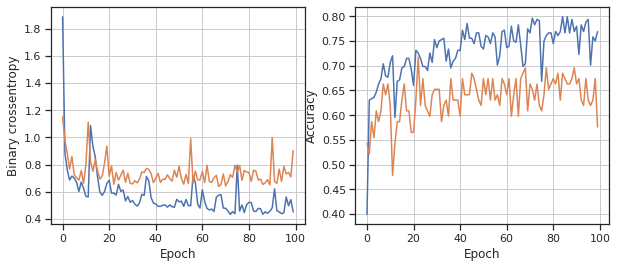

5/5 [==============================] - 0s 3ms/step - loss: 0.7672 - accuracy: 0.6883
64 nodes, dropout 0, lr 0.001, batch size 64


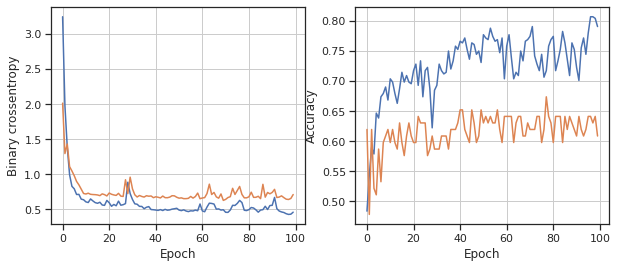

5/5 [==============================] - 0s 3ms/step - loss: 0.6370 - accuracy: 0.7013
64 nodes, dropout 0, lr 0.001, batch size 128


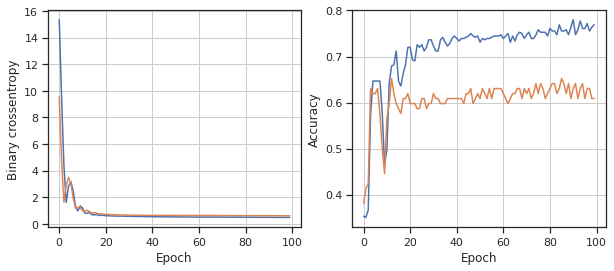

5/5 [==============================] - 0s 3ms/step - loss: 0.5834 - accuracy: 0.7403
64 nodes, dropout 0.2, lr 0.01, batch size 32


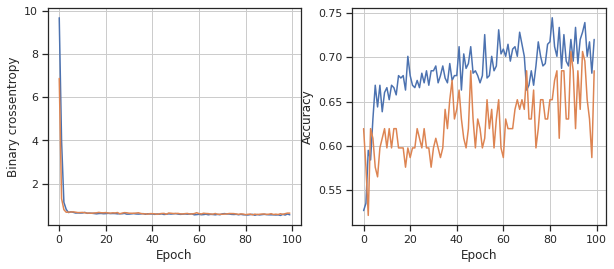

5/5 [==============================] - 0s 3ms/step - loss: 0.5756 - accuracy: 0.7208
64 nodes, dropout 0.2, lr 0.01, batch size 64


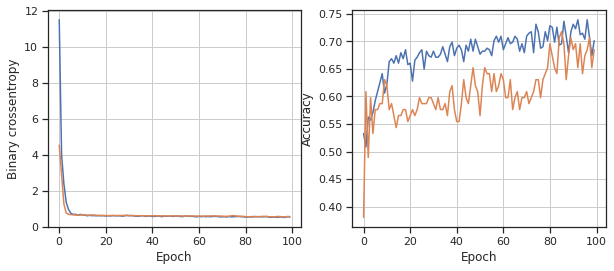

5/5 [==============================] - 0s 4ms/step - loss: 0.5614 - accuracy: 0.7143
64 nodes, dropout 0.2, lr 0.01, batch size 128


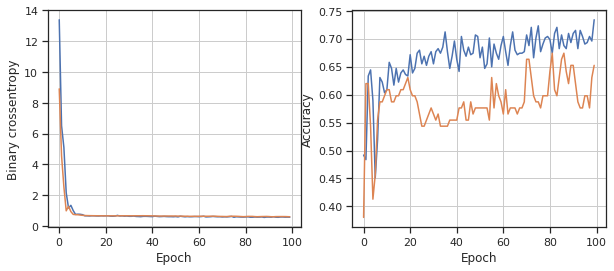

5/5 [==============================] - 0s 5ms/step - loss: 0.5856 - accuracy: 0.7013
64 nodes, dropout 0.2, lr 0.005, batch size 32


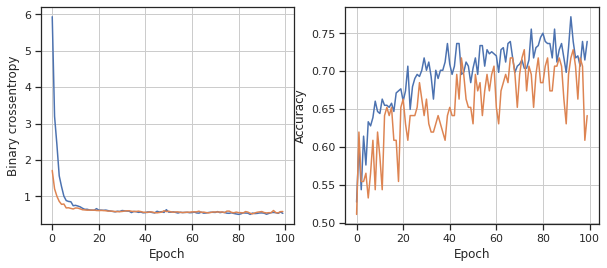

5/5 [==============================] - 0s 3ms/step - loss: 0.5344 - accuracy: 0.7143
64 nodes, dropout 0.2, lr 0.005, batch size 64


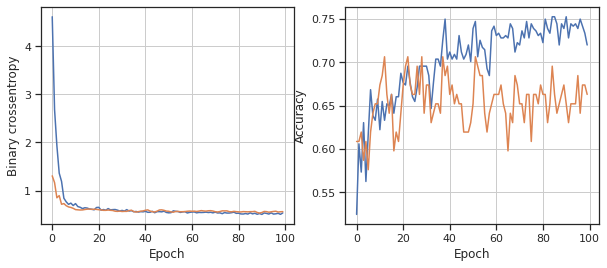

5/5 [==============================] - 0s 4ms/step - loss: 0.5678 - accuracy: 0.7208
64 nodes, dropout 0.2, lr 0.005, batch size 128


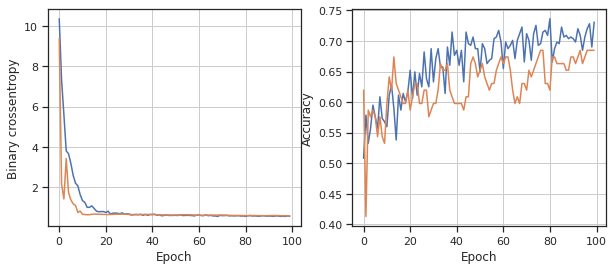

5/5 [==============================] - 0s 3ms/step - loss: 0.6011 - accuracy: 0.6818
64 nodes, dropout 0.2, lr 0.001, batch size 32


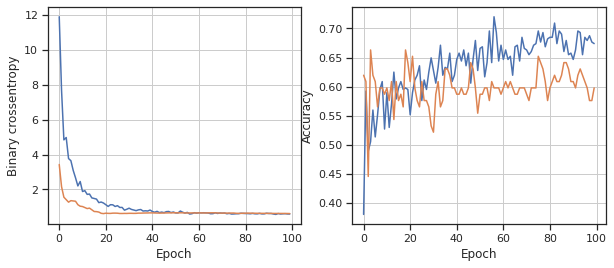

5/5 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.6948
64 nodes, dropout 0.2, lr 0.001, batch size 64


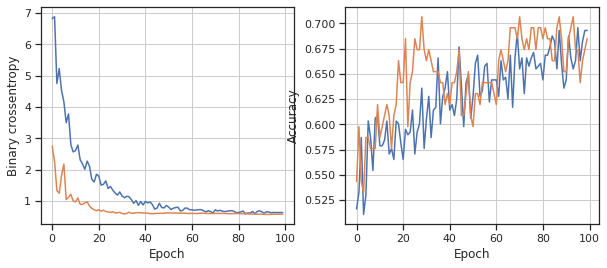

5/5 [==============================] - 0s 3ms/step - loss: 0.5806 - accuracy: 0.7273
64 nodes, dropout 0.2, lr 0.001, batch size 128


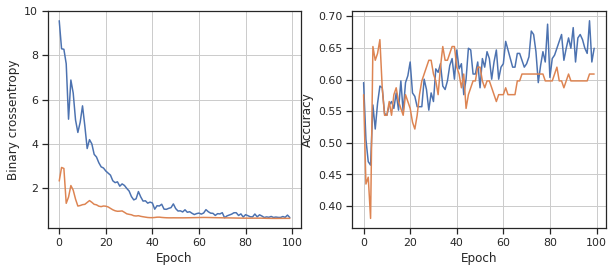

5/5 [==============================] - 0s 4ms/step - loss: 0.6174 - accuracy: 0.6753


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model2,history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model2.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

5/5 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       109
           1       0.72      0.51      0.60        45

    accuracy                           0.80       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.79      0.80      0.79       154

